Name: Holly Kular\
Date: 08-14-2024\
Email: hkular@ucsd.edu\
Description: plot results of decoding accuracy over time 

In [1]:
# imports
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
from scipy.stats import sem, t, ttest_ind, pearsonr
import itertools
import pandas as pd
from scipy.io import loadmat

In [24]:
# load all conds for a single model

RNN_params = {
    'afc': [6, 2],
    'coh': ['hi', 'lo'],
}


# pick a layer
fr = 3
# pick which model
modelnum = 0

combinations = list(itertools.product(RNN_params['afc'], RNN_params['coh']))

for afc, coh in combinations:

    # load and graph
    #full_file = f'/mnt/neurocube/local/serenceslab/holly/RNN_Geo/data/decoding/neutral/fr{fr}/{coh}_{afc}afc/boot_balanced_all{modelnum}.npz'
    full_file = f'/Volumes/serenceslab/holly/RNN_Geo/data/decoding/neutral/fr{fr}/{coh}_{afc}afc/boot_neutral_choice{modelnum}.npz'
    acc = np.load(full_file)
    
    for var in acc:
        # Create a new variable name by combining var with coh and afc
        new_var_name = f"{coh}_{afc}afc"
        globals()[new_var_name] = acc[var]
        

In [5]:
%whos

Variable       Type        Data/Info
------------------------------------
RNN_params     dict        n=2
acc            NpzFile     <numpy.lib.npyio.NpzFile <...>object at 0x7fd358c1f100>
afc            int         2
coh            str         lo
combinations   list        n=4
fr             int         1
full_file      str         /Volumes/serenceslab/holl<...>/boot_neutral_choice0.npz
hi_2afc        ndarray     1000x71x2: 142000 elems, type `float64`, 1136000 bytes (1.0833740234375 Mb)
hi_6afc        ndarray     1000x71x2: 142000 elems, type `float64`, 1136000 bytes (1.0833740234375 Mb)
itertools      module      <module 'itertools' (built-in)>
lo_2afc        ndarray     1000x71x2: 142000 elems, type `float64`, 1136000 bytes (1.0833740234375 Mb)
lo_6afc        ndarray     1000x71x2: 142000 elems, type `float64`, 1136000 bytes (1.0833740234375 Mb)
loadmat        function    <function loadmat at 0x7fd3789d2940>
modelnum       int         0
new_var_name   str         lo_2afc
np         

In [13]:
hi_6afc.shape

(1000, 71, 2)

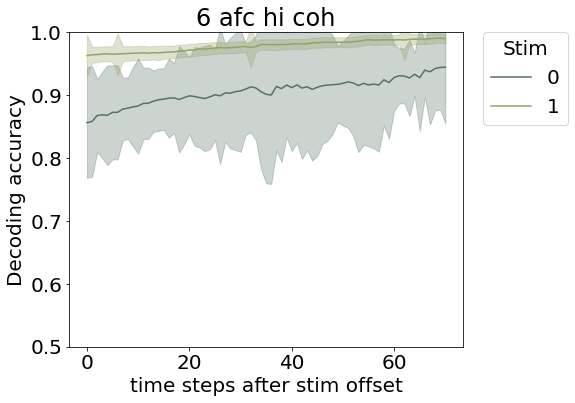

In [25]:
# plot

cond = hi_6afc
afc = 6
coh = 'hi'


confidence = .95
dof = cond.shape[0] - 1
t_crit = np.abs(t.ppf((1-confidence)/2,dof))
data = np.mean(cond, axis = 0)
x_data = np.arange(data.shape[0])

colors = ['#567164', '#93A267', '#7BA1BF', '#BE955D', '#995051', '#656193']

plt.figure(figsize = (10,6))

for i in range(2):
    s = cond[:,:,i].std(axis=0)
    plt.plot(data[:, i], label=f'{i}', color = colors[i])
    plt.fill_between(x_data, data[:,i] -s, data[:,i] +s, color = colors[i], alpha = 0.3)
    
    
    
#significant_regions = np.zeros(cond.shape[1], dtype=bool)
#alpha = 0.05
#for t_step in range(cond.shape[1]):
#    stim_0 = cond[:, t_step, 0]
#    for i in range(1, afc):
#        stim_i = cond[:, t_step, i]
#        t_stat, p_value = ttest_ind(stim_0, stim_i)
#        if p_value < alpha:
#            significant_regions[t_step] = True
#            break  # Once we find significance with any stim, we can stop checking

# Shade the regions where Stim 0 significantly differs from others
#plt.fill_between(x_data, plt.ylim()[0], plt.ylim()[1], where=significant_regions, color='red', alpha=0.1)

plt.rcParams.update({'font.size': 20})
plt.xlabel('time steps after stim offset')
plt.ylabel('Decoding accuracy')
plt.title(f'{afc} afc {coh} coh')
plt.legend(title = 'Stim', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.ylim(0.5, 1)
# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])


#plt.savefig(f'/Volumes/serenceslab/holly/RNN_Geo/data/decoding/expected/fr{fr}/{coh}_{afc}afc_mod{modelnum}_allstims.png')
plt.show()

